In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.datasets.samples_generator import make_blobs

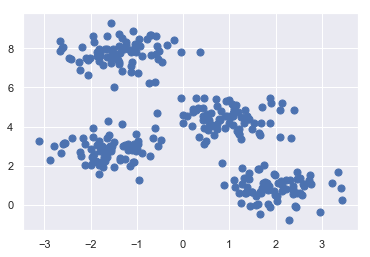

In [4]:
X,y=make_blobs(n_samples=300,centers=4,random_state=0,cluster_std=0.6)
plt.scatter(X[:,0],X[:,1],s=50);

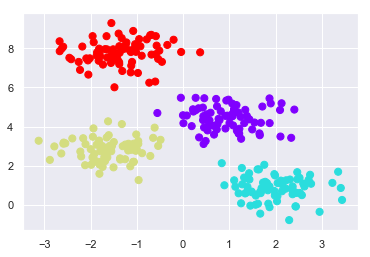

In [6]:
from sklearn.cluster import KMeans
KM=KMeans(4)
KM.fit(X)
y_kmeans=KM.predict(X)
plt.scatter(X[:,0],X[:,1],c=y_kmeans,s=50,cmap='rainbow');

In [14]:
def plot_kmeans_interactive(min_clusters=1,max_clusters=6):
    from IPython.html.widgets import interact
    from sklearn.metrics.pairwise import euclidean_distances
    from sklearn.datasets.samples_generator import make_blobs
    
    import warnings
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore')
        
        X,y=make_blobs(n_samples=300,centers=4,
                      random_state=0,cluster_std=0.60)
        def _kmeans_step(frame=0,n_clusters=4):
            rng =np.random.RandomState(2)
            labels=np.zeros(X.shape[0])
            centers=rng.randn(n_clusters,2)
            nsteps=frame // 3
            for i in range(nsteps + 1):
                old_centers=centers
                if i < nsteps or frame % 3 > 0:
                    dist = euclidean_distances(X,centers)
                    labels=dist.argmin(1)
                if i<nsteps or frame % 3 > 1:
                    centers=np.array([X[labels==j].mean(0) for j in range(n_clusters)])
                    nans=np.isnan(centers)
                    centers[nans]=old_centers[nans]
            plt.scatter(X[:,0],X[:,1],c=labels,s=50,cmap='rainbow',
                       vmin=0,vmax=n_clusters-1);
            plt.scatter(old_centers[:,0],old_centers[:,1],marker='o',
                       c=np.arange(n_clusters),
                       s=200,cmap='rainbow')
            plt.scatter(old_centers[:,0],old_centers[:,1],marker='o',
                       c='black',s=50)

            if frame % 3 == 2:
                for i in range(n_clusters):
                    plt.annotate('',centers[i],old_centers[i],
                                arrowprops=dict(arrowstyle='->',linewidth=1))
                    plt.scatter(centers[:,0],centers[:,1], marker='o',
                                c=np.arange(n_clusters),
                                s=200,cmap='rainbow')
                    plt.scatter(centers[:,0],centers[:,1],marker='o',
                               c='black',s=50)
                plt.xlim(-4,4)
                plt.ylim(-2,10)
                if frame % 3 == 1:
                    plt.text(3.8,9.5,"1. Reassign points to nearest centroid",
                            ha='right',va='top',size=14)
                elif frame % 3 == 2:
                    plt.text(3.9,9.5,"2. Update centroids to cluster means",
                            ha='right',va='top',size=14)
    return interact(_kmeans_step,frame=[0,50],
               n_clusters=[min_clusters,max_clusters])  

In [15]:
import numpy as np
plot_kmeans_interactive();

interactive(children=(Dropdown(description='frame', options=(0, 50), value=0), Dropdown(description='n_cluster…

In [16]:
from sklearn.datasets import load_iris
iris=load_iris()

In [17]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [18]:
iris.data.shape

(150, 4)

In [19]:
n_samples,n_features=iris.data.shape
n_samples,n_features

(150, 4)

In [20]:
iris.target.shape

(150,)

In [21]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [22]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


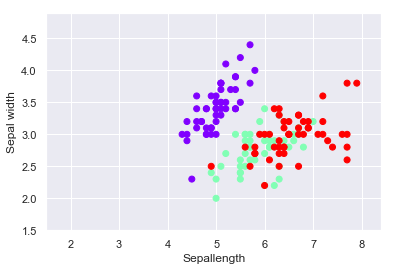

In [23]:
X=iris.data[:,:2]
Y=iris.target
x_min,x_max=X[:,1].min()-.5,X[:,0].max()+.5
y_min,y_max=X[:,1].min()-.5,X[:,1].max()+.5
plt.scatter(X[:,0],X[:,1],c=Y,cmap='rainbow')
plt.xlabel('Sepallength')
plt.ylabel('Sepal width')
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max);

In [25]:
df=sns.load_dataset("iris")
type(df)
df.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

C:\Users\santacrw\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


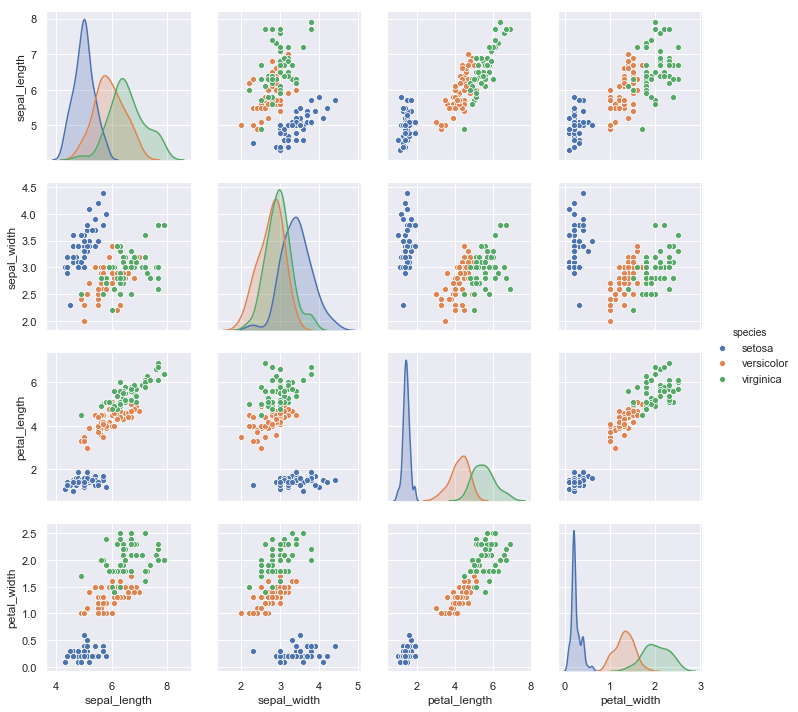

In [26]:
sns.pairplot(df,hue='species');

In [28]:
import pandas as pd
df2=pd.DataFrame(iris.data,columns=iris.feature_names)
df2.columns=['sepal_length','sepal_width','petal_length','petal_width']
df2['species']=iris.target_names[iris.target]

In [29]:
df2.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [30]:
if 'species' in df2.columns:
    df2=df2.drop('species',1)
    df2['cluster']=iris.target

In [31]:
df2.head()

sepal_length  sepal_width  petal_length  petal_width  cluster
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0

In [32]:
n_clusters=3

In [34]:
X,y=iris.data,iris.target
k_means=KMeans(n_clusters,random_state=2)
k_means.fit(X)
y_pred=k_means.predict(X)

In [35]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [36]:
data=np.array([y,y_pred]).T

In [39]:
compare=pd.DataFrame(data)
compare.columns=['actual','predicted']

In [40]:
compare['same']=(compare['actual']==compare['predicted'])

In [41]:
compare.head()

actual  predicted  same
0       0          0  True
1       0          0  True
2       0          0  True
3       0          0  True
4       0          0  True

In [42]:
compare.same.sum()

134

C:\Users\santacrw\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\santacrw\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\santacrw\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\santacrw\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value enco

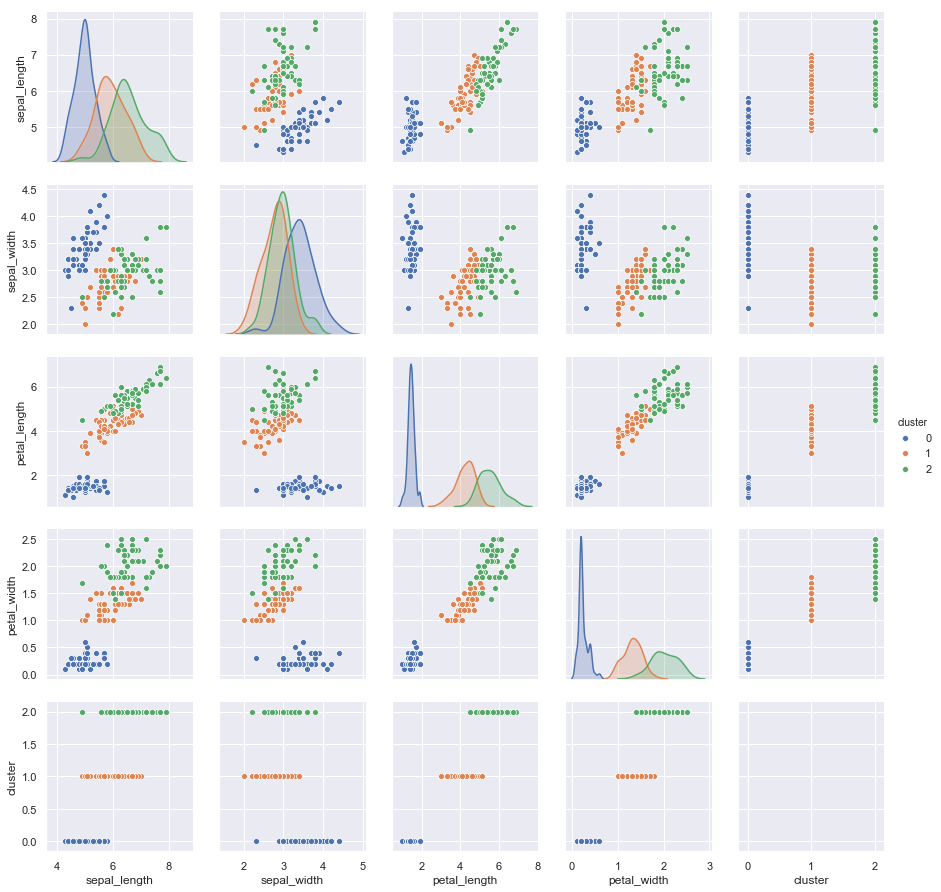

In [43]:
df['cluster']=y_pred
sns.pairplot(df2,hue="cluster");

In [44]:
n_clusters=4

C:\Users\santacrw\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\santacrw\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\santacrw\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\santacrw\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value enco

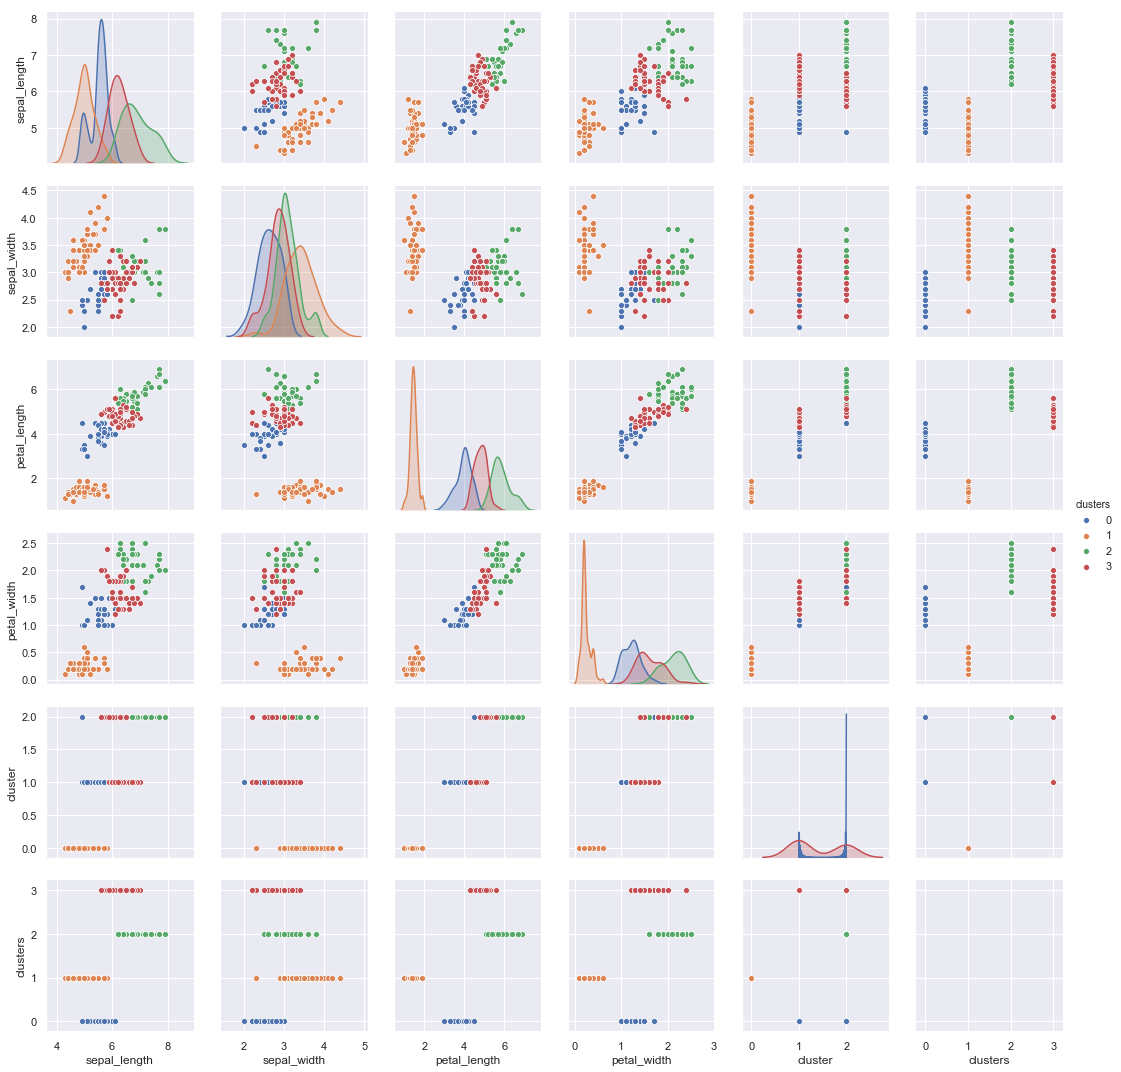

In [47]:
X,y=iris.data,iris.target
k_means=KMeans(n_clusters,random_state=2)
k_means.fit(X)
y_pred=k_means.predict(X)
df2['clusters']=y_pred
sns.pairplot(df2,hue='clusters');

Reduced dataset shape: (150, 2)
Meaning of the 2 components
0.361 x sepal length (cm) + -0.085 x sepal width (cm) + 0.857 x petal length (cm) + 0.358 x petal width (cm)
0.657 x sepal length (cm) + 0.730 x sepal width (cm) + -0.173 x petal length (cm) + -0.075 x petal width (cm)


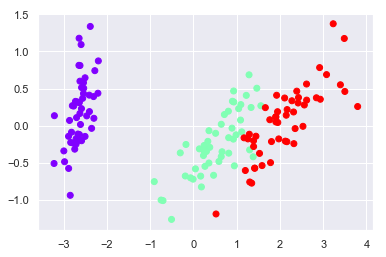

In [48]:
from sklearn.decomposition import PCA
X,y=iris.data, iris.target
pca=PCA(n_components=2)
pca.fit(X)
X_reduced=pca.transform(X)
print
print("Reduced dataset shape:", X_reduced.shape)
plt.scatter(X_reduced[:,0],X_reduced[:,1],c=y,cmap='rainbow')
print
print("Meaning of the 2 components")
for component in pca.components_:
    print(" + ".join("%.3f x %s" % (value,name)
                    for value,name in zip(component,
                                         iris.feature_names)))

In [49]:
n_clusters=3

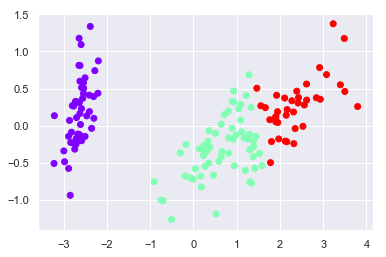

In [51]:
X,y=iris.data,iris.target
k_means=KMeans(n_clusters,random_state=2)
k_means.fit(X)
y_pred=k_means.predict(X)
plt.scatter(X_reduced[:,0],X_reduced[:,1],c=y_pred,cmap='rainbow');